In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/kaggle/input/power-consumption-prediction-dataset/power consumption.csv')
data.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1,Zone 2,Zone 3
0,01-01-2017 00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,01-01-2017 00:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,01-01-2017 00:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,01-01-2017 00:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,01-01-2017 00:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DateTime               52416 non-null  object 
 1   Temperature            52416 non-null  float64
 2   Humidity               52416 non-null  float64
 3   Wind Speed             52416 non-null  float64
 4   general diffuse flows  52416 non-null  float64
 5   diffuse flows          52416 non-null  float64
 6   Zone 1                 52416 non-null  float64
 7   Zone 2                 52416 non-null  float64
 8   Zone 3                 52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


# EDA

In [4]:
# Check data types
print(data.dtypes)

DateTime                  object
Temperature              float64
Humidity                 float64
Wind Speed               float64
general diffuse flows    float64
diffuse flows            float64
Zone 1                   float64
Zone 2                   float64
Zone 3                   float64
dtype: object


In [5]:
# Convert 'DateTime' to datetime, handling inconsistent formats
try:
    data['DateTime'] = pd.to_datetime(data['DateTime'], errors='coerce', dayfirst=False)
except Exception as e:
    print(f"Error: {e}")

# Check for rows where conversion failed
failed_conversions = data[data['DateTime'].isna()]
if not failed_conversions.empty:
    print("Rows with invalid DateTime format:")
    print(failed_conversions)

# Drop or handle rows with invalid DateTime
data = data.dropna(subset=['DateTime'])

# Re-check the DateTime column
print(data['DateTime'].head())


Rows with invalid DateTime format:
      DateTime  Temperature  Humidity  Wind Speed  general diffuse flows  \
1728       NaT       15.180      83.6       0.079                  0.048   
1729       NaT       15.170      83.7       0.080                  0.073   
1730       NaT       15.180      83.7       0.075                  0.051   
1731       NaT       15.200      83.9       0.076                  0.062   
1732       NaT       15.170      84.1       0.080                  0.051   
...        ...          ...       ...         ...                    ...   
52411      NaT        7.010      72.4       0.080                  0.040   
52412      NaT        6.947      72.6       0.082                  0.051   
52413      NaT        6.900      72.8       0.086                  0.084   
52414      NaT        6.758      73.0       0.080                  0.066   
52415      NaT        6.580      74.1       0.081                  0.062   

       diffuse flows       Zone 1     Zone 2       Z

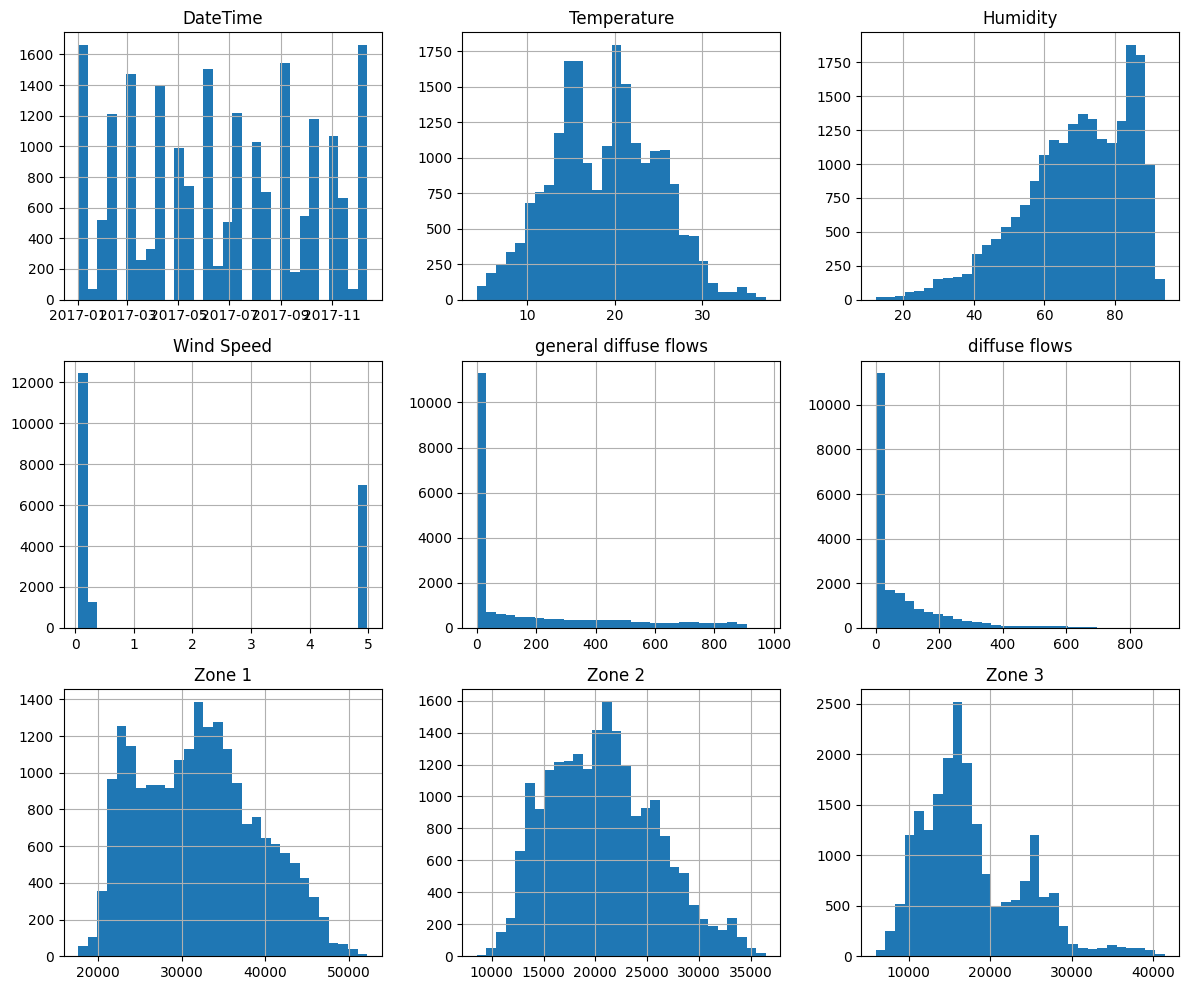

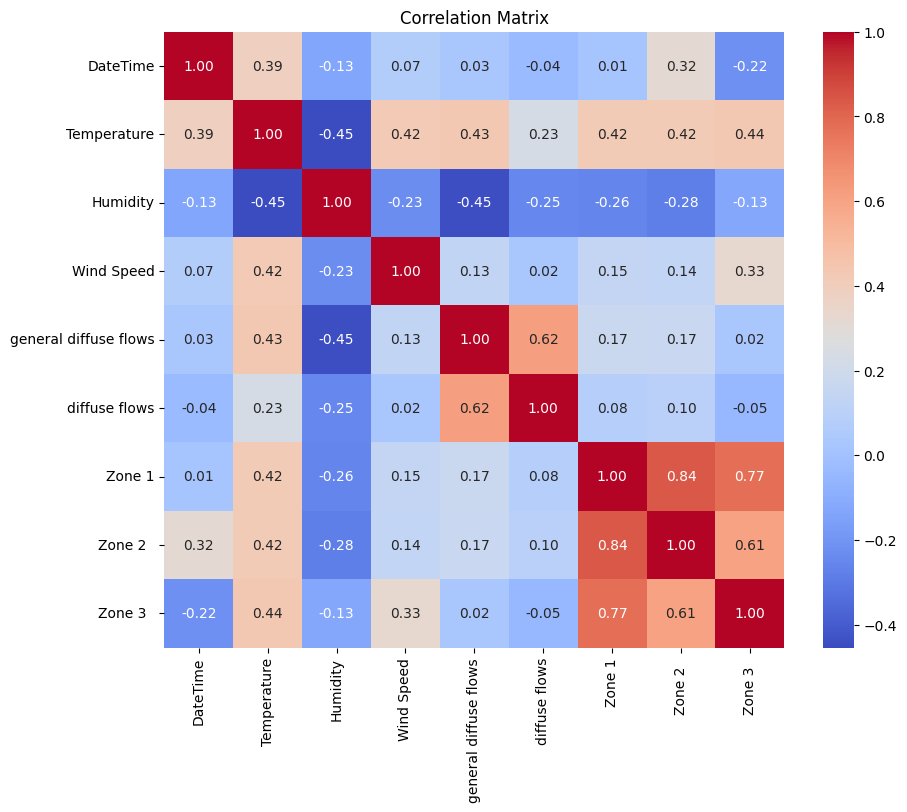

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all numerical columns
data.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

# Check correlations between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


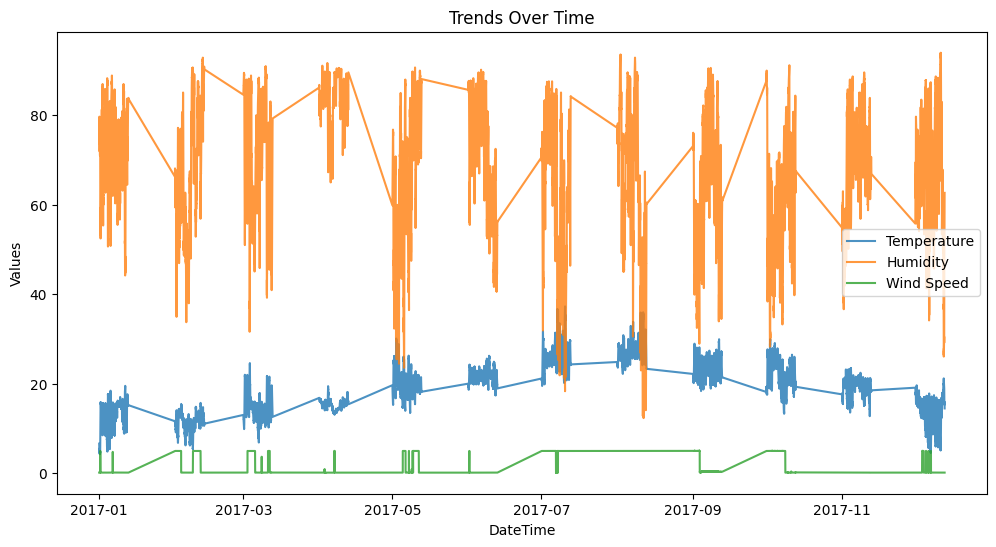

In [7]:
# Plot trends for temperature, humidity, and wind speed over time
plt.figure(figsize=(12, 6))
plt.plot(data['DateTime'], data['Temperature'], label='Temperature', alpha=0.8)
plt.plot(data['DateTime'], data['Humidity'], label='Humidity', alpha=0.8)
plt.plot(data['DateTime'], data['Wind Speed'], label='Wind Speed', alpha=0.8)
plt.legend()
plt.title('Trends Over Time')
plt.xlabel('DateTime')
plt.ylabel('Values')
plt.show()


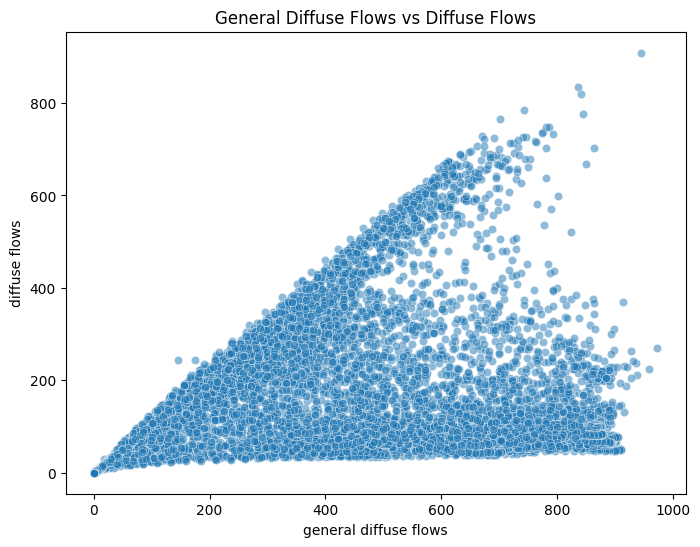

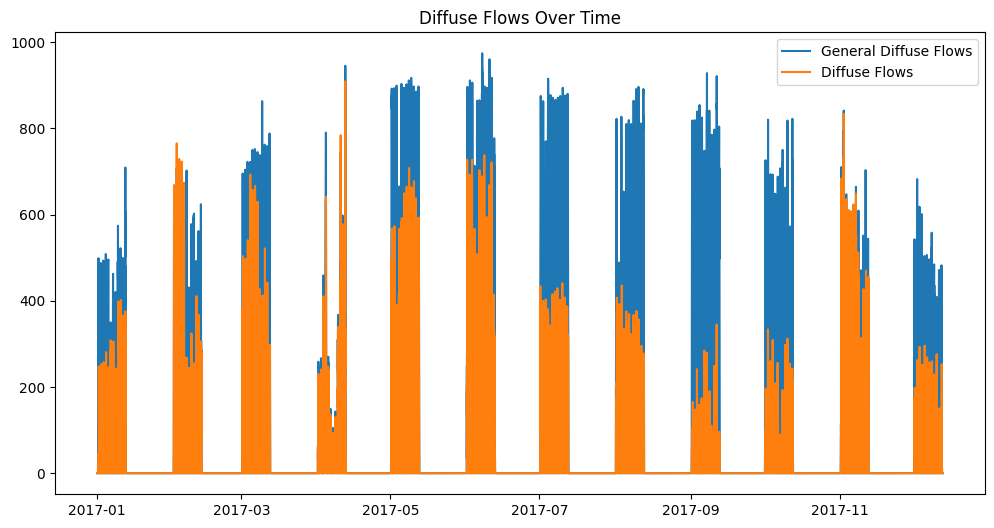

In [8]:
# Scatter plot to check relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='general diffuse flows', y='diffuse flows', data=data, alpha=0.5)
plt.title('General Diffuse Flows vs Diffuse Flows')
plt.show()

# Line plot for flows
plt.figure(figsize=(12, 6))
plt.plot(data['DateTime'], data['general diffuse flows'], label='General Diffuse Flows')
plt.plot(data['DateTime'], data['diffuse flows'], label='Diffuse Flows')
plt.legend()
plt.title('Diffuse Flows Over Time')
plt.show()


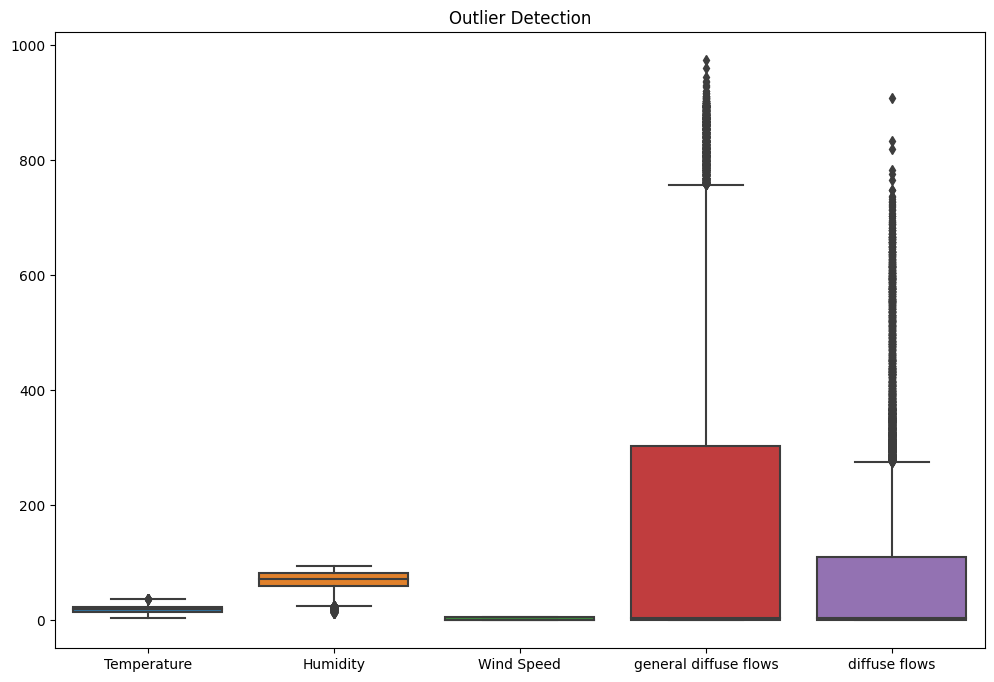

In [9]:
# Boxplots to detect outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows']])
plt.title('Outlier Detection')
plt.show()


In [10]:
# Extract additional time-based features
data['Year'] = data['DateTime'].dt.year
data['Month'] = data['DateTime'].dt.month
data['Day'] = data['DateTime'].dt.day
data['Hour'] = data['DateTime'].dt.hour

# Group by month and average key columns
monthly_avg = data.groupby('Month')[['Temperature', 'Humidity', 'Wind Speed']].mean()

print("\nMonthly Averages:")
print(monthly_avg)



Monthly Averages:
       Temperature   Humidity  Wind Speed
Month                                    
1        12.561983  72.558698    0.104932
2        11.172237  67.038767    2.377145
3        14.447201  71.714450    1.626239
4        15.201036  83.900590    0.197618
5        20.182436  65.458478    1.584395
6        21.498681  72.359641    0.140398
7        26.324294  63.879595    4.703829
8        27.527471  64.314265    4.906343
9        23.105584  65.721979    1.351059
10       21.915683  62.240966    3.218135
11       18.925608  71.232066    0.074476
12       13.048394  68.893235    0.464223


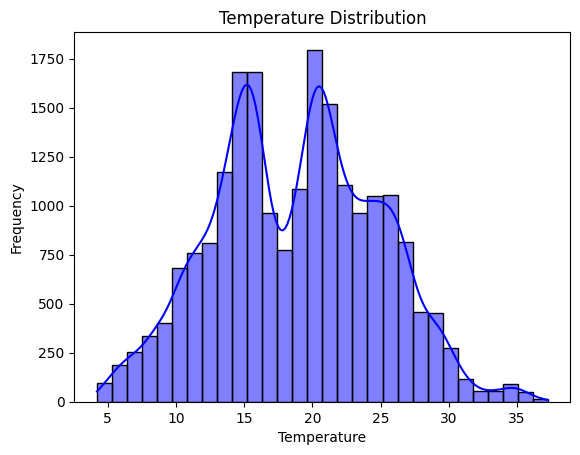

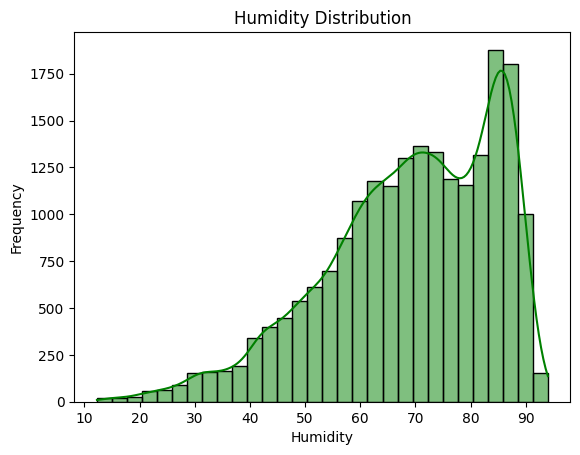

In [11]:
# Visualize distributions
import seaborn as sns

# Temperature Distribution
sns.histplot(data['Temperature'], kde=True, bins=30, color='blue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Humidity Distribution
sns.histplot(data['Humidity'], kde=True, bins=30, color='green')
plt.title('Humidity Distribution')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()


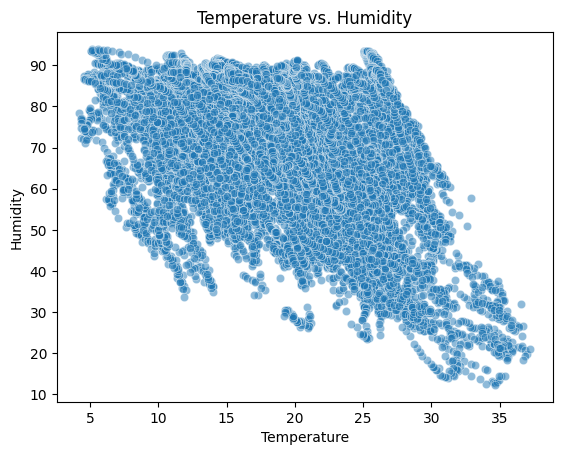

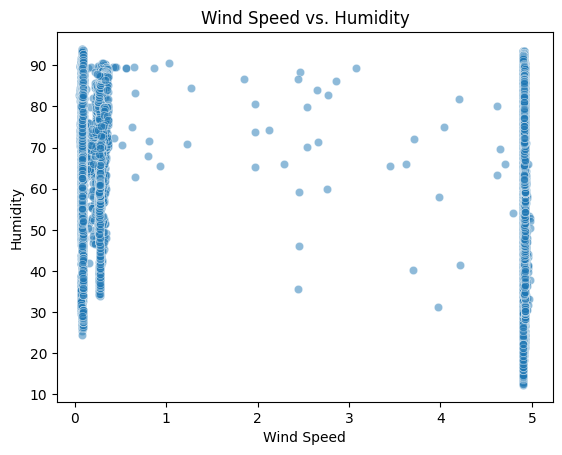

In [12]:
# Temperature vs. Humidity
sns.scatterplot(x=data['Temperature'], y=data['Humidity'], alpha=0.5)
plt.title('Temperature vs. Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()

# Wind Speed vs. Humidity
sns.scatterplot(x=data['Wind Speed'], y=data['Humidity'], alpha=0.5)
plt.title('Wind Speed vs. Humidity')
plt.xlabel('Wind Speed')
plt.ylabel('Humidity')
plt.show()


In [13]:
# Detect anomalies in temperature
mean_temp = data['Temperature'].mean()
std_temp = data['Temperature'].std()

# Define an anomaly as being >3 standard deviations away
anomalies = data[(data['Temperature'] > mean_temp + 3 * std_temp) | 
                 (data['Temperature'] < mean_temp - 3 * std_temp)]

print("\nTemperature Anomalies:")
print(anomalies)



Temperature Anomalies:
                 DateTime  Temperature  Humidity  Wind Speed  \
27452 2017-07-10 15:20:00        37.01     19.81       4.914   
27453 2017-07-10 15:30:00        36.88     19.24       4.918   
27455 2017-07-10 15:50:00        37.26     21.11       4.914   

       general diffuse flows  diffuse flows       Zone 1     Zone 2    \
27452                  780.0          69.66  39088.90365  27018.98734   
27453                  764.0          68.57  38489.30233  26840.50633   
27455                  723.0          68.66  38789.10299  26407.59494   

          Zone 3    Year  Month  Day  Hour  
27452  27950.46025  2017      7   10    15  
27453  27751.63180  2017      7   10    15  
27455  27793.80753  2017      7   10    15  


In [14]:
zone_columns = [col for col in data.columns if 'Zone' in col]
print(f"Detected Zone Columns: {zone_columns}")

# Compute averages for detected zone columns
zone_avg = data[zone_columns].mean()
print("\nZone-Wise Averages:")
print(zone_avg)


Detected Zone Columns: ['Zone 1', 'Zone 2  ', 'Zone 3  ']

Zone-Wise Averages:
Zone 1      32086.712491
Zone 2      20747.253198
Zone 3      17781.417367
dtype: float64


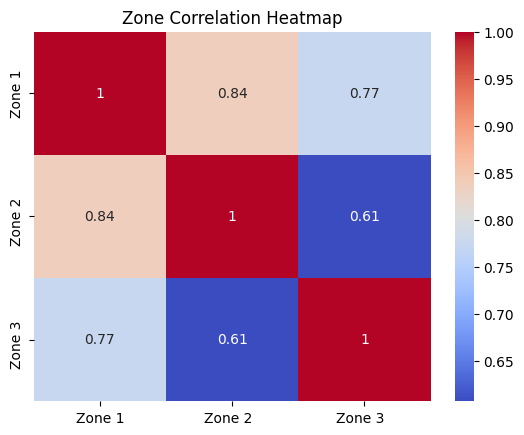

In [15]:
# Zone correlation
zone_corr = data[zone_columns].corr()
sns.heatmap(zone_corr, annot=True, cmap='coolwarm')
plt.title('Zone Correlation Heatmap')
plt.show()


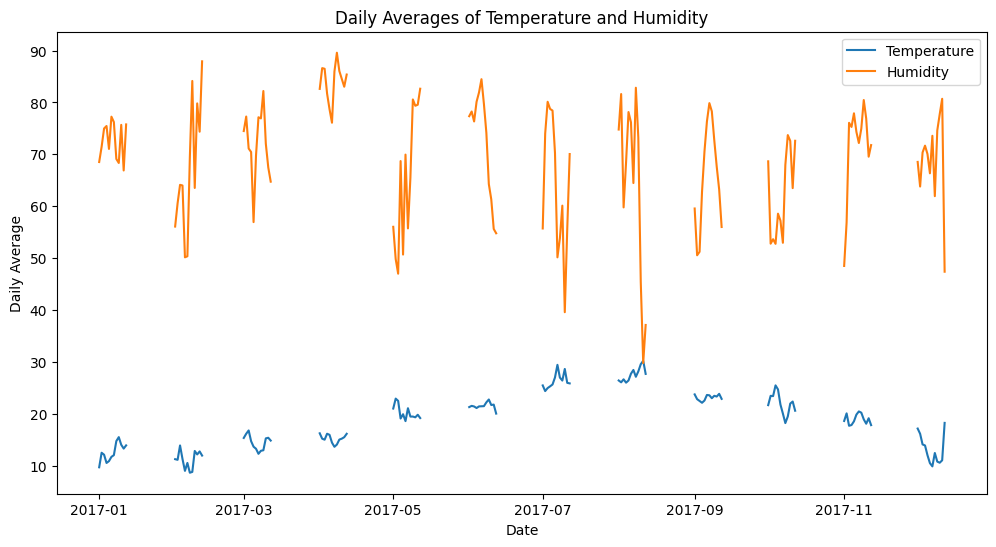

In [16]:
# Resample data to daily averages
data.set_index('DateTime', inplace=True)
daily_avg = data.resample('D').mean()

# Plot daily trends
plt.figure(figsize=(12, 6))
plt.plot(daily_avg.index, daily_avg['Temperature'], label='Temperature')
plt.plot(daily_avg.index, daily_avg['Humidity'], label='Humidity')
plt.xlabel('Date')
plt.ylabel('Daily Average')
plt.title('Daily Averages of Temperature and Humidity')
plt.legend()
plt.show()


# Solution

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [18]:
predictors = ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows']
targets = zone_columns

In [19]:
X = data[predictors]
y = data[targets]

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [22]:
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Squared Error: 10847697.461389204
Mean Absolute Error: 2145.805533687533
R² Score: 0.7236857793692874


In [24]:
# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=predictors)
print("\nFeature Importances:")
print(feature_importances.sort_values(ascending=False))


Feature Importances:
Temperature              0.413104
Humidity                 0.198325
Wind Speed               0.150433
general diffuse flows    0.145011
diffuse flows            0.093127
dtype: float64


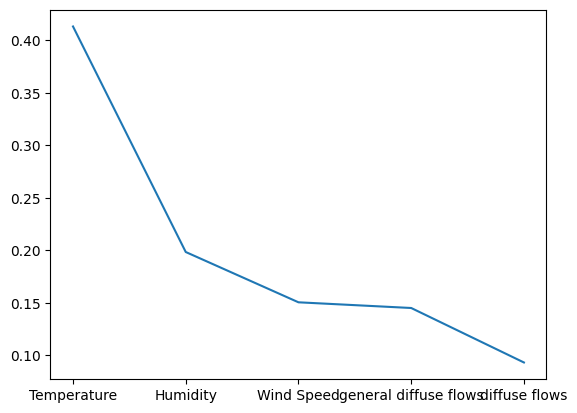

In [25]:
plt.plot(feature_importances)

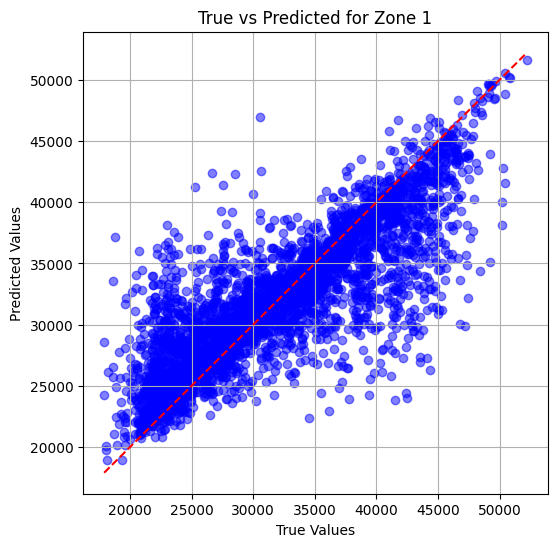

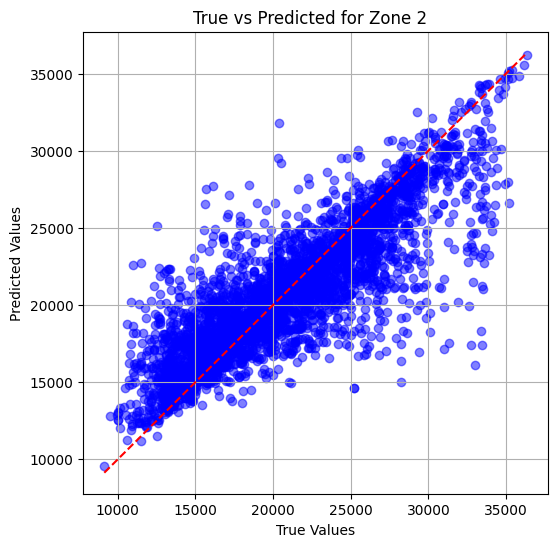

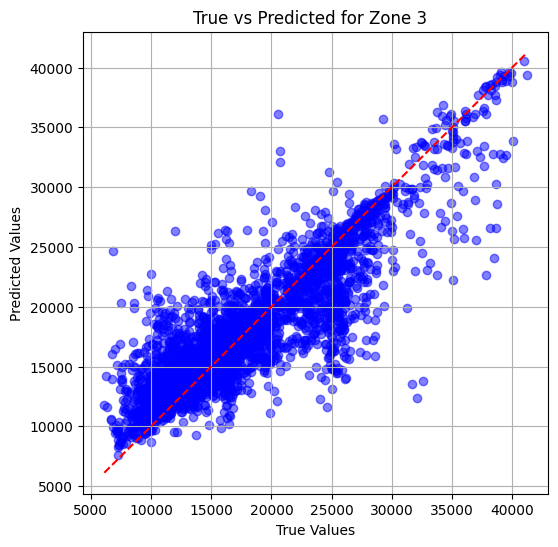

In [26]:
import matplotlib.pyplot as plt

# Scatter plot of true vs predicted values for each zone
for i, zone in enumerate(targets):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test.iloc[:, i], y_pred[:, i], alpha=0.5, color='blue')
    plt.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 
             [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], color='red', linestyle='--')
    plt.title(f"True vs Predicted for {zone}")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.grid(True)
    plt.show()


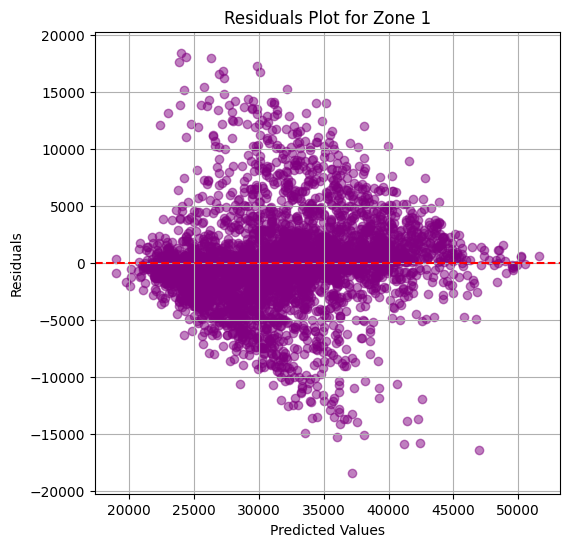

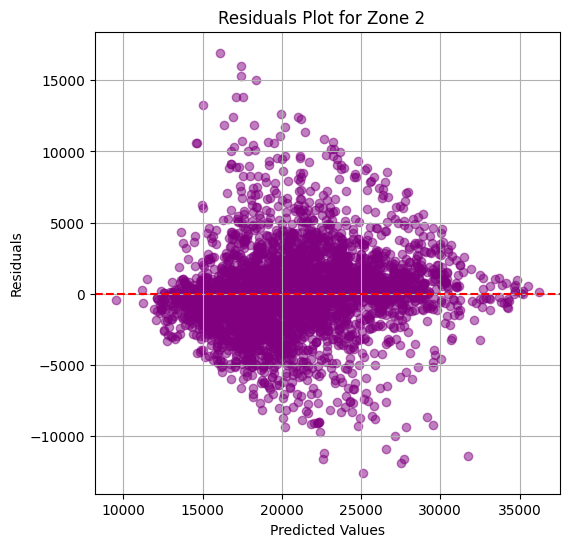

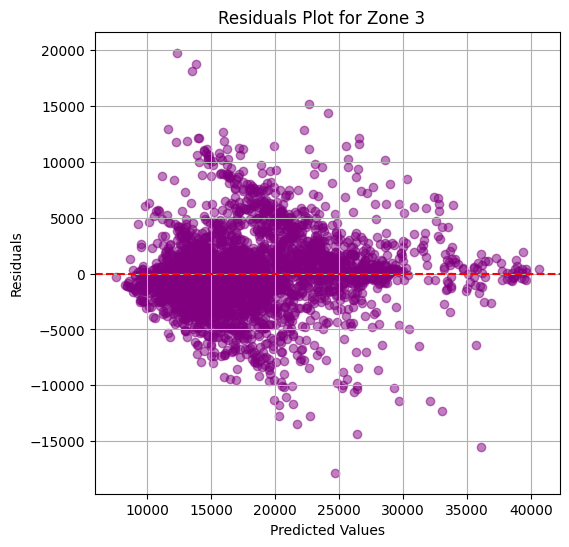

In [27]:
for i, zone in enumerate(targets):
    residuals = y_test.iloc[:, i] - y_pred[:, i]
    plt.figure(figsize=(6, 6))
    plt.scatter(y_pred[:, i], residuals, alpha=0.5, color='purple')
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f"Residuals Plot for {zone}")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.grid(True)
    plt.show()


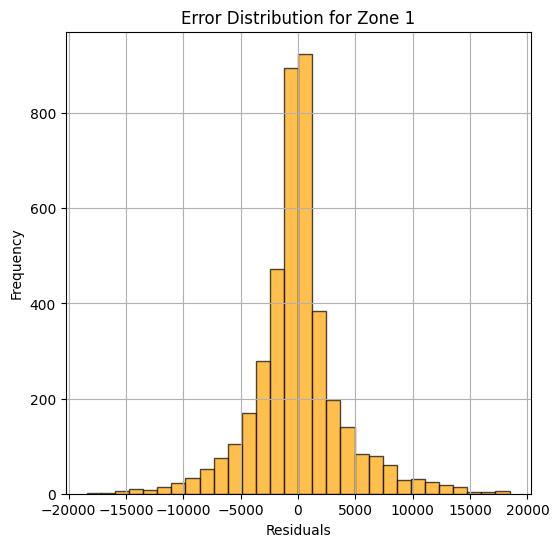

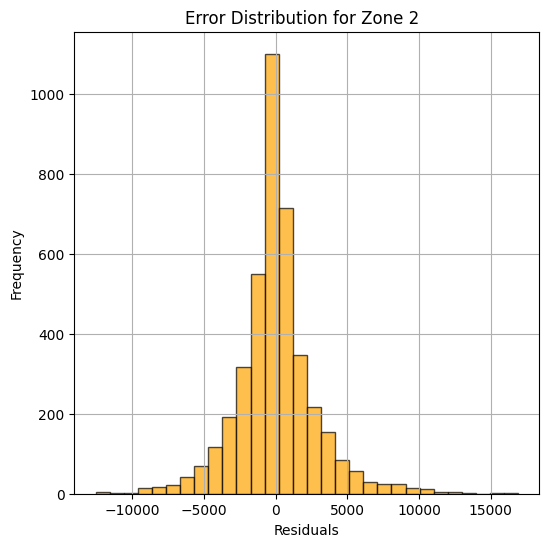

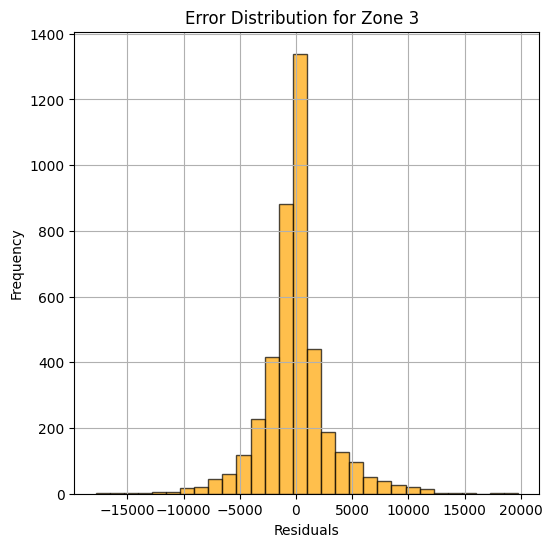

In [28]:
for i, zone in enumerate(targets):
    residuals = y_test.iloc[:, i] - y_pred[:, i]
    plt.figure(figsize=(6, 6))
    plt.hist(residuals, bins=30, color='orange', alpha=0.7, edgecolor='black')
    plt.title(f"Error Distribution for {zone}")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()


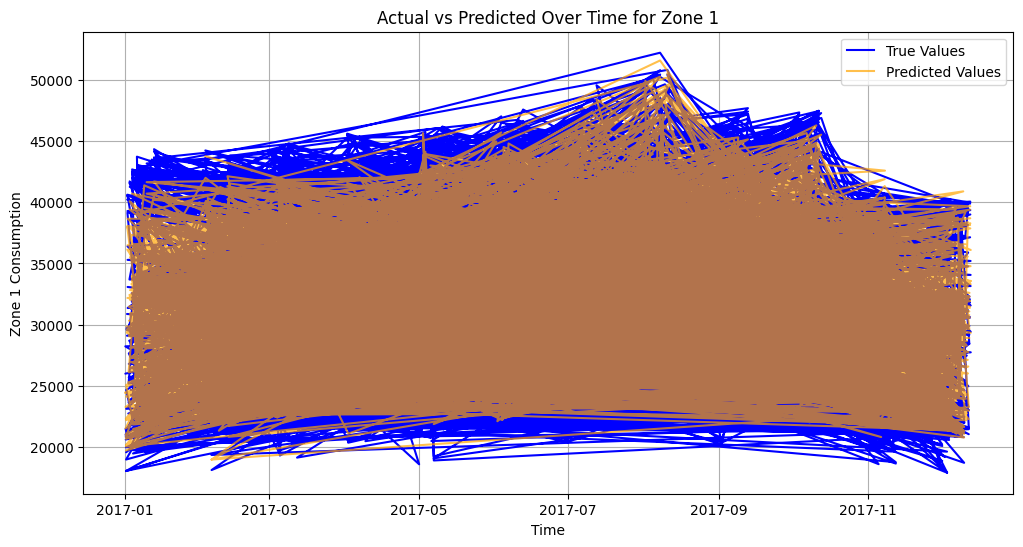

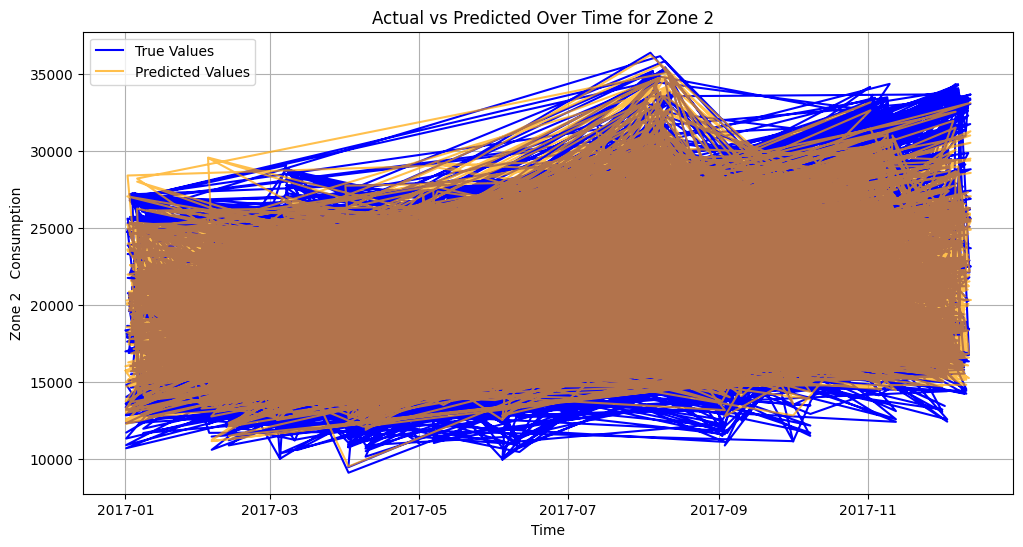

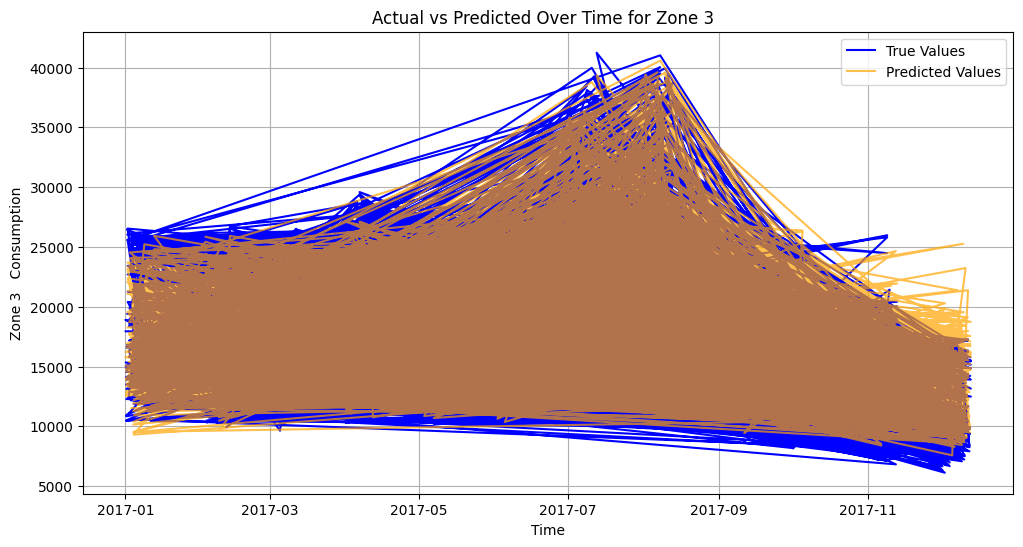

In [29]:
for i, zone in enumerate(targets):
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.index, y_test.iloc[:, i], label='True Values', color='blue')
    plt.plot(y_test.index, y_pred[:, i], label='Predicted Values', color='orange', alpha=0.7)
    plt.title(f"Actual vs Predicted Over Time for {zone}")
    plt.xlabel("Time")
    plt.ylabel(f"{zone} Consumption")
    plt.legend()
    plt.grid(True)
    plt.show()


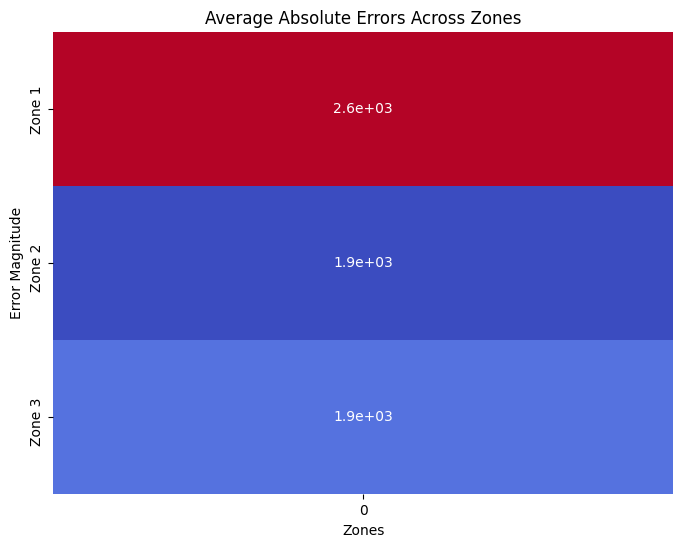

In [30]:
import seaborn as sns

errors = y_test - y_pred
error_df = pd.DataFrame(errors, columns=targets)
plt.figure(figsize=(8, 6))
sns.heatmap(error_df.abs().mean().to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title("Average Absolute Errors Across Zones")
plt.xlabel("Zones")
plt.ylabel("Error Magnitude")
plt.show()


-> ridge regressor

In [31]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Ridge Regression model
ridge_model = Ridge(alpha=0.001)  # You can tune the alpha value
ridge_model.fit(X_train, y_train)

# Predicting with the Ridge model
ridge_predictions = ridge_model.predict(X_test)

# Evaluating Ridge Regression
for i, zone in enumerate(targets):
    mse = mean_squared_error(y_test.iloc[:, i], ridge_predictions[:, i])
    r2 = r2_score(y_test.iloc[:, i], ridge_predictions[:, i])
    print(f"{zone} - Ridge Regression")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}\n")


Zone 1 - Ridge Regression
Mean Squared Error: 40864860.73
R^2 Score: 0.18

Zone 2   - Ridge Regression
Mean Squared Error: 22519707.86
R^2 Score: 0.19

Zone 3   - Ridge Regression
Mean Squared Error: 29601105.90
R^2 Score: 0.24



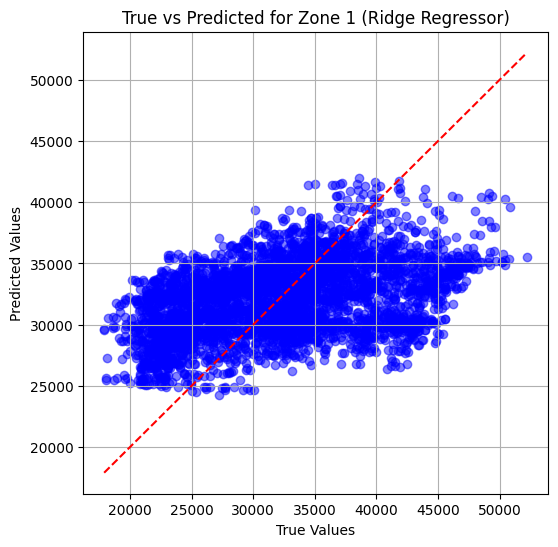

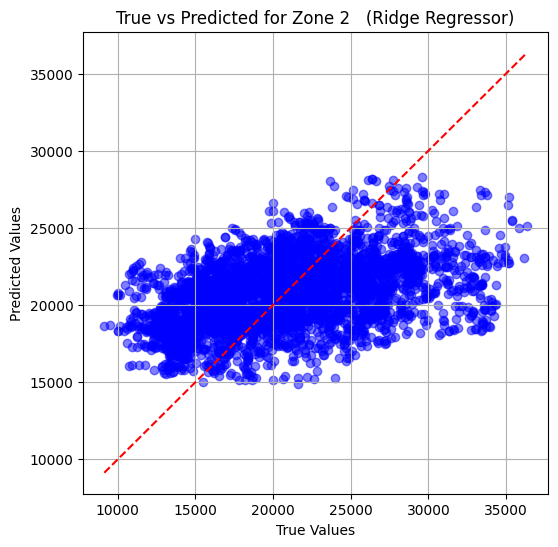

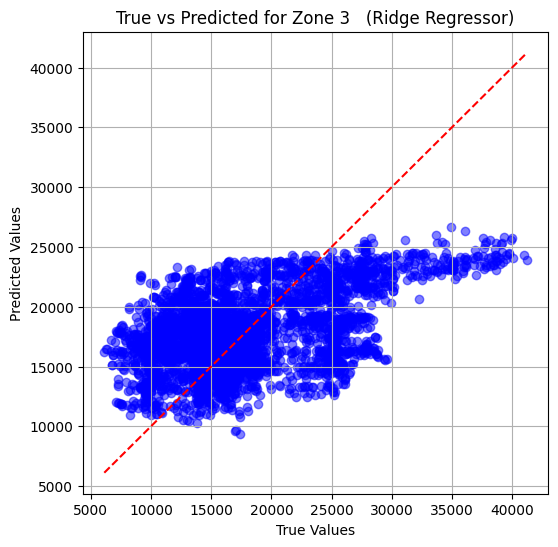

In [32]:
for i, zone in enumerate(targets):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test.iloc[:, i], ridge_predictions[:, i], alpha=0.5, color='blue')
    plt.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
             [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], color='red', linestyle='--')
    plt.title(f"True vs Predicted for {zone} (Ridge Regressor)")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.grid(True)
    plt.show()


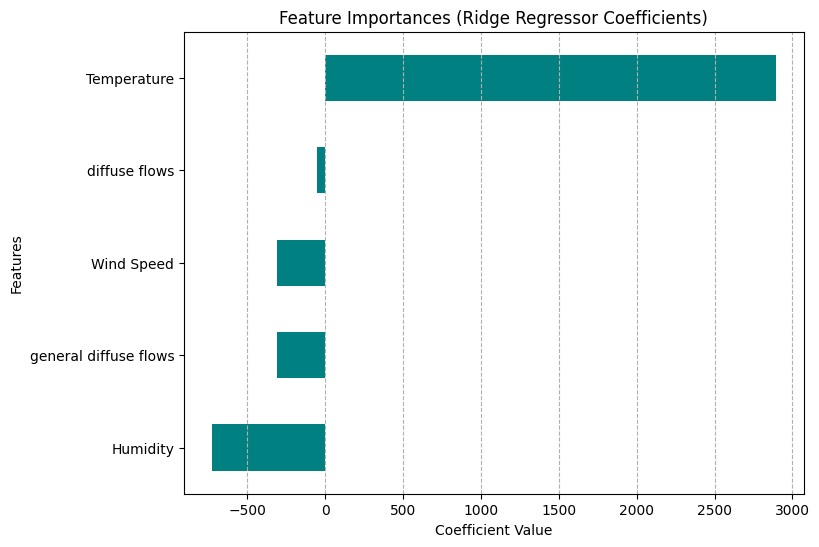

In [33]:
ridge_coefficients = pd.Series(ridge_model.coef_[0], index=X.columns)
plt.figure(figsize=(8, 6))
ridge_coefficients.sort_values().plot(kind='barh', color='teal')
plt.title("Feature Importances (Ridge Regressor Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--')
plt.show()


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define the parameter grid for alpha
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

# Set up the Ridge model and GridSearchCV
ridge = Ridge()
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Perform grid search
grid_search.fit(X_train, y_train)

# Best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# Use the best alpha value to retrain the Ridge model
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train, y_train)


Best alpha: 10


Ridge(alpha=10)

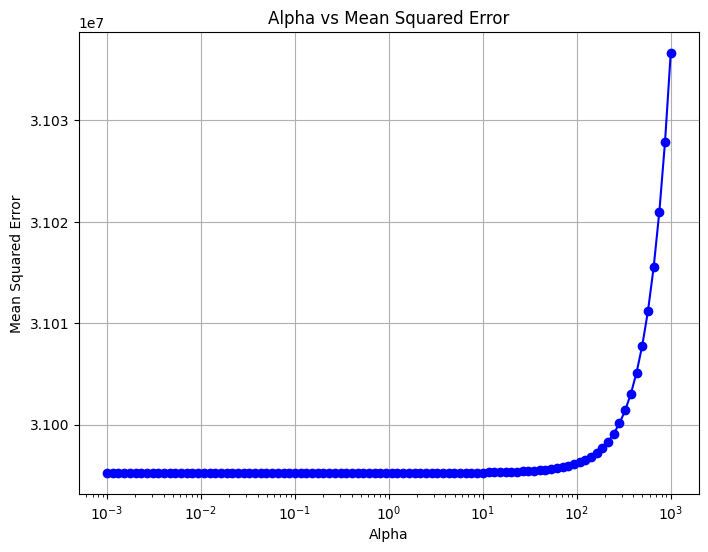

In [35]:
from sklearn.metrics import mean_squared_error

alphas = np.logspace(-3, 3, 100)
mse_values = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    predictions = ridge.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mse_values.append(mse)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(alphas, mse_values, marker='o', color='blue', linestyle='-')
plt.xscale('log')  # Use a log scale for alpha
plt.title("Alpha vs Mean Squared Error")
plt.xlabel("Alpha")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()


In [36]:
import optuna
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

def objective(trial):
    alpha = trial.suggest_loguniform('alpha', 0.001, 1000)
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    predictions = ridge.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    return mse

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# Best alpha value
best_alpha = study.best_params['alpha']
print(f"Best alpha: {best_alpha}")

# Retrain the model with the best alpha
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train, y_train)


[I 2025-01-15 20:27:50,164] A new study created in memory with name: no-name-7aaa5945-c158-4b74-924c-f3f8d7655321
[I 2025-01-15 20:27:50,174] Trial 0 finished with value: 30996985.38173199 and parameters: {'alpha': 150.4414130092704}. Best is trial 0 with value: 30996985.38173199.
[I 2025-01-15 20:27:50,183] Trial 1 finished with value: 30995227.49807194 and parameters: {'alpha': 0.5239054069375875}. Best is trial 1 with value: 30995227.49807194.
[I 2025-01-15 20:27:50,192] Trial 2 finished with value: 30995242.856642205 and parameters: {'alpha': 3.4437594982891353}. Best is trial 1 with value: 30995227.49807194.
[I 2025-01-15 20:27:50,201] Trial 3 finished with value: 30995226.83414003 and parameters: {'alpha': 0.39425394397311847}. Best is trial 3 with value: 30995226.83414003.
[I 2025-01-15 20:27:50,209] Trial 4 finished with value: 30995224.835702192 and parameters: {'alpha': 0.0021781889807777127}. Best is trial 4 with value: 30995224.835702192.
[I 2025-01-15 20:27:50,217] Trial 5

Best alpha: 0.0010031414973394894


Ridge(alpha=0.0010031414973394894)

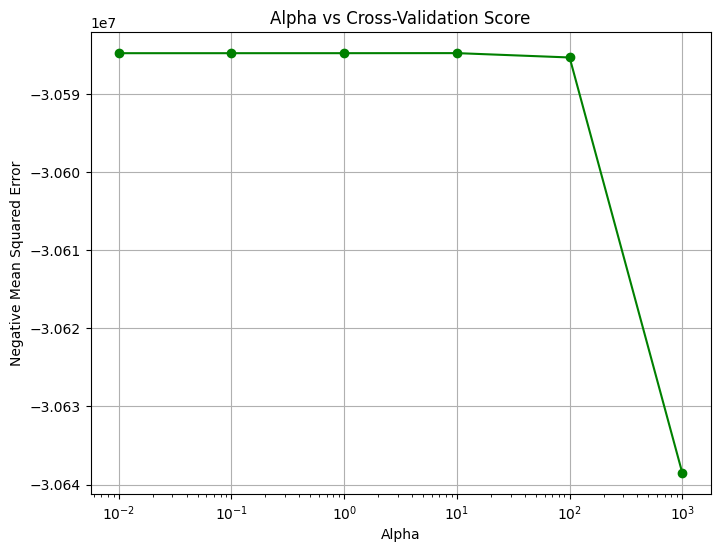

In [37]:
from sklearn.model_selection import cross_val_score
alphas = [0.01, 0.1, 1, 10, 100, 1000]
cv_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    scores = cross_val_score(ridge, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    cv_scores.append(np.mean(scores))

# Plot the CV scores
plt.figure(figsize=(8, 6))
plt.plot(alphas, cv_scores, marker='o', color='green', linestyle='-')
plt.xscale('log')
plt.title("Alpha vs Cross-Validation Score")
plt.xlabel("Alpha")
plt.ylabel("Negative Mean Squared Error")
plt.grid(True)
plt.show()


In [38]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

                      Model           MSE        R2
2             Random Forest  1.113150e+07  0.716037
3         Gradient Boosting  2.154893e+07  0.451651
0         Linear Regression  3.099522e+07  0.204817
1          Ridge Regression  3.099523e+07  0.204817
4  Support Vector Regressor  3.735205e+07  0.042846


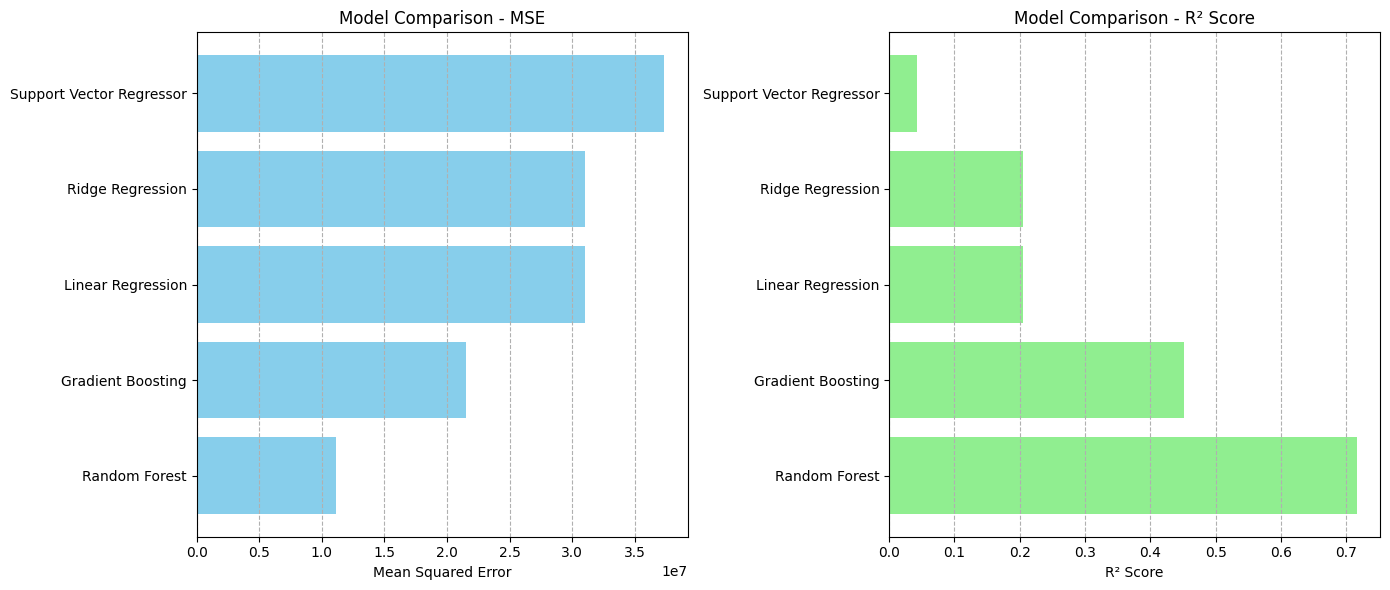

In [39]:
from sklearn.multioutput import MultiOutputRegressor

# Define models
base_models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf')
}

results = []

# Wrap models in MultiOutputRegressor
for model_name, model in base_models.items():
    multi_model = MultiOutputRegressor(model)
    multi_model.fit(X_train, y_train)
    predictions = multi_model.predict(X_test)

    # Calculate MSE and R2 score for the multi-output case
    mse = mean_squared_error(y_test, predictions, multioutput='raw_values')
    r2 = r2_score(y_test, predictions, multioutput='raw_values')

    results.append({"Model": model_name, "MSE": mse.mean(), "R2": r2.mean()})

# Create a DataFrame for comparison
results_df = pd.DataFrame(results).sort_values(by="MSE", ascending=True)

# Display results
print(results_df)

# Visualization
plt.figure(figsize=(14, 6))

# MSE plot
plt.subplot(1, 2, 1)
plt.barh(results_df['Model'], results_df['MSE'], color='skyblue')
plt.title("Model Comparison - MSE")
plt.xlabel("Mean Squared Error")
plt.grid(axis='x', linestyle='--')

# R2 Score plot
plt.subplot(1, 2, 2)
plt.barh(results_df['Model'], results_df['R2'], color='lightgreen')
plt.title("Model Comparison - R² Score")
plt.xlabel("R² Score")
plt.grid(axis='x', linestyle='--')

plt.tight_layout()
plt.show()
